In [75]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [76]:
test_targets

array([ 7.2, 18.8, 19. , 27. , 22.2, 24.5, 31.2, 22.9, 20.5, 23.2, 18.6,
       14.5, 17.8, 50. , 20.8, 24.3, 24.2, 19.8, 19.1, 22.7, 12. , 10.2,
       20. , 18.5, 20.9, 23. , 27.5, 30.1,  9.5, 22. , 21.2, 14.1, 33.1,
       23.4, 20.1,  7.4, 15.4, 23.8, 20.1, 24.5, 33. , 28.4, 14.1, 46.7,
       32.5, 29.6, 28.4, 19.8, 20.2, 25. , 35.4, 20.3,  9.7, 14.5, 34.9,
       26.6,  7.2, 50. , 32.4, 21.6, 29.8, 13.1, 27.5, 21.2, 23.1, 21.9,
       13. , 23.2,  8.1,  5.6, 21.7, 29.6, 19.6,  7. , 26.4, 18.9, 20.9,
       28.1, 35.4, 10.2, 24.3, 43.1, 17.6, 15.4, 16.2, 27.1, 21.4, 21.5,
       22.4, 25. , 16.6, 18.6, 22. , 42.8, 35.1, 21.5, 36. , 21.9, 24.1,
       50. , 26.7, 25. ])

In [ ]:
train_data.dtype

dtype('float64')

In [ ]:
train_data[:2, :4]

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, 0.00000e+00],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, 0.00000e+00]])

In [ ]:
train_data[:5, :]

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, 0.00000e+00, 5.38000e-01,
        6.14200e+00, 9.17000e+01, 3.97690e+00, 4.00000e+00, 3.07000e+02,
        2.10000e+01, 3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, 0.00000e+00, 4.15000e-01,
        7.61000e+00, 1.57000e+01, 6.27000e+00, 2.00000e+00, 3.48000e+02,
        1.47000e+01, 3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 6.31000e-01,
        4.97000e+00, 1.00000e+02, 1.33250e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.75520e+02, 3.26000e+00],
       [3.96100e-02, 0.00000e+00, 5.19000e+00, 0.00000e+00, 5.15000e-01,
        6.03700e+00, 3.45000e+01, 5.98530e+00, 5.00000e+00, 2.24000e+02,
        2.02000e+01, 3.96900e+02, 8.01000e+00],
       [3.69311e+00, 0.00000e+00, 1.81000e+01, 0.00000e+00, 7.13000e-01,
        6.37600e+00, 8.84000e+01, 2.56710e+00, 2.40000e+01, 6.66000e+02,
        2.02000e+01, 3.91430e+02, 1.46500e+01]])

In [ ]:
train_targets.shape

(404,)

In [37]:
#libraries and dependant importation needed for mnist classification
import keras
from keras.layers import Dropout
from matplotlib import pyplot as plt
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import SGD
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
import numpy as np

In [3]:
from matplotlib._api.deprecation import MatplotlibDeprecationWarning
#loading the mnist dataset needed in this section
(train_x, train_y),  (test_x, test_y) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [4]:
#checking the shape of the dataset loaded
print(f'The shape of the train data is {train_x.shape} with label shape of {train_y.shape}\n')

print(f'The shape of the test data is {test_x.shape} with label shape of {test_y.shape}')

The shape of the train data is (60000, 28, 28) with label shape of (60000,)

The shape of the test data is (10000, 28, 28) with label shape of (10000,)


The analysis of the MNIST dataset reveals that it comprises grayscale images with dimensions of 28 by 28 pixels. The dataset consists of 60,000 training samples and an additional 10,000 test samples, all in grayscale format.

In [5]:
#image preparation
#changing image format into three dimensions
train_x = train_x.reshape(-1, 28, 28,1)
print(train_x.shape)
test_x = test_x.reshape(-1, 28, 28, 1)
print(test_x.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [6]:
#This indicates the initial dimension of the true label data in the training set.
train_y.shape

(60000,)

In [7]:
#This indicates the initial value of the first item
train_y[0]

5

In [8]:
#checking the label data and usability
train_y = to_categorical(train_y)
print(train_y.shape)
test_y = to_categorical(test_y)
print(test_y.shape)

(60000, 10)
(10000, 10)


Categorizing the label data in the MNIST dataset involves converting the numerical class labels (0 to 9) into a binary matrix representation known as one-hot encoding. This transformation is necessary for training machine learning models, particularly in multiclass classification tasks. One-hot encoding ensures that each digit class is represented by a unique binary vector, enabling the models to learn from the categorical data effectively.

In [9]:
#this indicates the value of the first item after encodingfor machine learning usability
train_y[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

 it is essential to examine the pixel intensity in the images as it provides valuable information about the distribution of pixel values and helps identify potential issues with the data. By scaling the image intensity, we ensure that the pixel values are within a certain range, which can improve the performance of machine learning algorithms and make the data more suitable for training models.

In [11]:
#scaling the pixel and type casting
print(f'the presnt pixel max value for train data is {np.max(train_x)} with data type {train_x.dtype} \n')
print(f'the presnt pixel max value for test data is {np.max(test_x)}  with data type {test_x.dtype} \n')

#scaling both data
train_norm = train_x.astype('float32')
test_norm = test_x.astype('float32')

train_norm = train_norm/255.0
test_norm = test_norm/255.0

print(f'the presnt pixel max value for train data normalised is {np.max(train_norm)} with data type {train_norm.dtype} \n')
print(f'the presnt pixel max value for test data normalised is {np.max(test_norm)}  with data type {test_norm.dtype} \n')


the presnt pixel max value for train data is 255 with data type uint8 

the presnt pixel max value for test data is 255  with data type uint8 

the presnt pixel max value for train data normalised is 1.0 with data type float32 

the presnt pixel max value for test data normalised is 1.0  with data type float32 



In [43]:
#defining the model strucure to be use for classification
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5, 5), activation="relu", input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu', padding = 'same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
# model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
# model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
# model.add(Dense(64, activation='relu'))
# model.add(Dropout(0.5))
model.add(Dense(50, activation='relu'))

model.add(Dense(10, activation='softmax'))

In [44]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 12, 12, 32)       0         
 g2D)                                                            
                                                                 
 dropout_17 (Dropout)        (None, 12, 12, 32)        0         
                                                                 
 conv2d_21 (Conv2D)          (None, 12, 12, 64)        51264     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 6, 6, 64)         

In [45]:
opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model on the training data
history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.1, verbose=1)

# Predict on the test data
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)

# Evaluate the model's performance
accuracy = accuracy_score(np.argmax(y_test, axis=1), y_pred_labels)
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred_labels)
classification_rep = classification_report(np.argmax(y_test, axis=1), y_pred_labels)

# Display the results
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [47]:

#model training
history = model.fit(train_norm, train_y, epochs=10, batch_size=128, validation_split= 0.1)

Epoch 1/10
422/422 [==============================] - 128s 302ms/step - loss: 0.0671 - accuracy: 0.9802 - val_loss: 0.0281 - val_accuracy: 0.9923
Epoch 2/10
422/422 [==============================] - 117s 277ms/step - loss: 0.0596 - accuracy: 0.9821 - val_loss: 0.0259 - val_accuracy: 0.9915
Epoch 3/10
422/422 [==============================] - 116s 275ms/step - loss: 0.0535 - accuracy: 0.9841 - val_loss: 0.0275 - val_accuracy: 0.9920
Epoch 4/10
422/422 [==============================] - 114s 269ms/step - loss: 0.0495 - accuracy: 0.9857 - val_loss: 0.0271 - val_accuracy: 0.9922
Epoch 5/10
422/422 [==============================] - 115s 272ms/step - loss: 0.0477 - accuracy: 0.9856 - val_loss: 0.0263 - val_accuracy: 0.9927
Epoch 6/10
422/422 [==============================] - 115s 272ms/step - loss: 0.0459 - accuracy: 0.9860 - val_loss: 0.0277 - val_accuracy: 0.9923
Epoch 7/10
422/422 [==============================] - 116s 274ms/step - loss: 0.0432 - accuracy: 0.9868 - val_loss: 0.0267 -

313/313 [==============================] - 6s 20ms/step
Accuracy: 0.9935
Confusion Matrix:
[[ 978    0    0    0    0    0    0    1    1    0]
 [   0 1132    1    0    0    0    1    1    0    0]
 [   1    0 1029    0    0    0    0    1    1    0]
 [   0    0    1 1005    0    3    0    0    1    0]
 [   0    0    0    0  979    0    0    0    1    2]
 [   1    0    0    5    0  883    1    0    1    1]
 [   4    1    0    0    1    2  949    0    1    0]
 [   0    2    4    1    0    0    0 1017    1    3]
 [   0    0    1    1    0    1    0    0  969    2]
 [   1    3    0    0    5    2    0    0    4  994]]
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       980
           1       0.99      1.00      1.00      1135
           2       0.99      1.00      1.00      1032
           3       0.99      1.00      0.99      1010
           4       0.99      1.00      1.00       982
           5       0.99      0

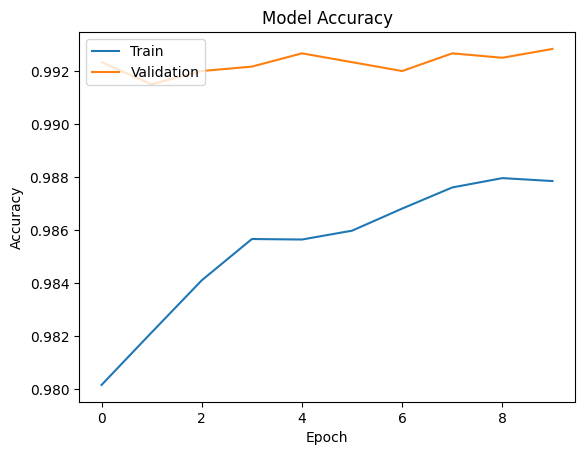

In [50]:
# Predict on the test data
y_pred = model.predict(test_norm)
y_pred_labels = np.argmax(y_pred, axis=1)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Evaluate the model's performance
accuracy = accuracy_score(np.argmax(test_y, axis=1), y_pred_labels)
conf_matrix = confusion_matrix(np.argmax(test_y, axis=1), y_pred_labels)
classification_rep = classification_report(np.argmax(test_y, axis=1), y_pred_labels)

# Display the results
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

# Plot training and validation accuracy over epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [58]:
#making prediction
print(test_norm.shape)
#using an image from the test data
chosen_index = 0
img = test_norm[chosen_index, : , :]
np.max(img)
#reshaping into ussable format by model
img = img.reshape(1, 28, 28, 1)
print(img.shape)

(10000, 28, 28, 1)
(1, 28, 28, 1)


1/1 [==============================] - 0s 24ms/step
the predicted number is 7


the true label value is 7

The chosen image is displayed below



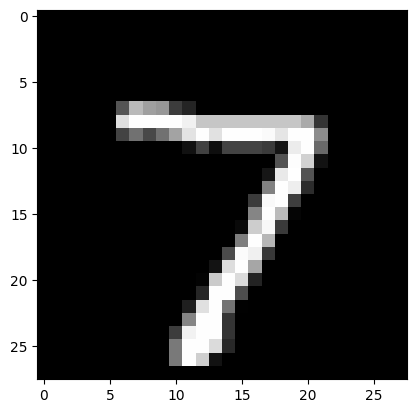

In [69]:
# predict the class
predict_value = model.predict(img)
digit = np.argmax(predict_value)
print(f'the predicted number is {digit}\n')
#checking the real value from true label
real_value = np.argmax(test_y[chosen_index])
print(f'\nthe true label value is {real_value}\n')
print('The chosen image is displayed below\n')
plt.imshow(img[0, : , :], cmap = 'gray')

(1, 28, 28, 1)
1/1 [==============================] - 0s 23ms/step
the predicted number is 1


the true label value is 1

The chosen image is displayed below



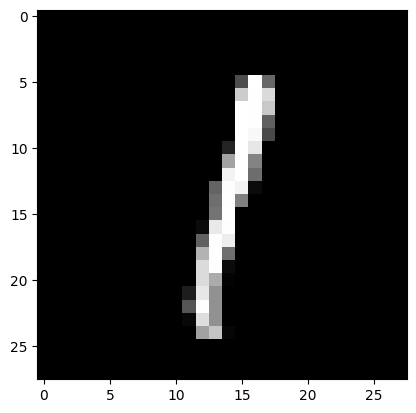

In [70]:
#making prediction
#using an image from the test data
chosen_index = 57
img = test_norm[chosen_index, : , :]
np.max(img)
#reshaping into ussable format by model
img = img.reshape(1, 28, 28, 1)
print(img.shape)
# predict the class
predict_value = model.predict(img)
digit = np.argmax(predict_value)
print(f'the predicted number is {digit}\n')
#checking the real value from true label
real_value = np.argmax(test_y[chosen_index])
print(f'\nthe true label value is {real_value}\n')
print('The chosen image is displayed below\n')
plt.imshow(img[0, : , :], cmap = 'gray')

(1, 28, 28, 1)
1/1 [==============================] - 0s 24ms/step
the predicted number is 4


the true label value is 4

The chosen image is displayed below



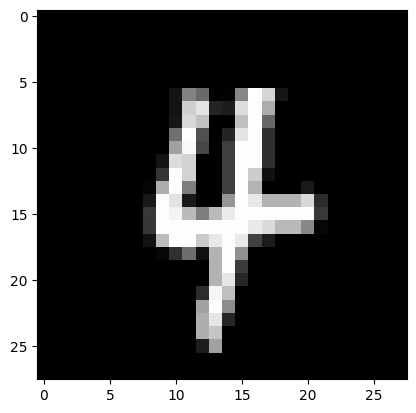

In [71]:
#making prediction
#using an image from the test data
chosen_index = 1157
img = test_norm[chosen_index, : , :]
np.max(img)
#reshaping into ussable format by model
img = img.reshape(1, 28, 28, 1)
print(img.shape)
# predict the class
predict_value = model.predict(img)
digit = np.argmax(predict_value)
print(f'the predicted number is {digit}\n')
#checking the real value from true label
real_value = np.argmax(test_y[chosen_index])
print(f'\nthe true label value is {real_value}\n')
print('The chosen image is displayed below\n')
plt.imshow(img[0, : , :], cmap = 'gray')

(1, 28, 28, 1)
1/1 [==============================] - 0s 28ms/step
the predicted number is 1


the true label value is 1

The chosen image is displayed below



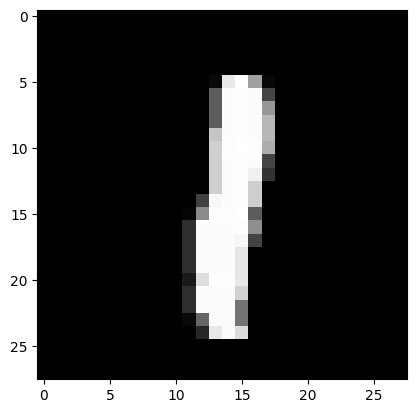

In [72]:
#making prediction
#using an image from the test data
chosen_index = 2590
img = test_norm[chosen_index, : , :]
np.max(img)
#reshaping into ussable format by model
img = img.reshape(1, 28, 28, 1)
print(img.shape)
# predict the class
predict_value = model.predict(img)
digit = np.argmax(predict_value)
print(f'the predicted number is {digit}\n')
#checking the real value from true label
real_value = np.argmax(test_y[chosen_index])
print(f'\nthe true label value is {real_value}\n')
print('The chosen image is displayed below\n')
plt.imshow(img[0, : , :], cmap = 'gray')


(1, 28, 28, 1)
1/1 [==============================] - 0s 33ms/step
the predicted number is 3


the true label value is 3

The chosen image is displayed below



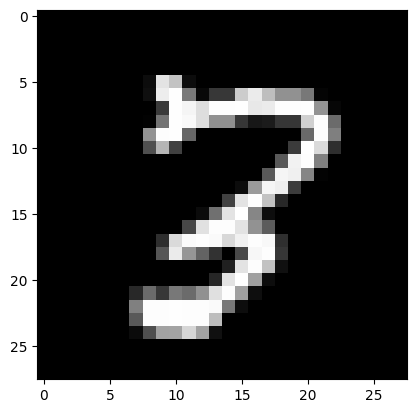

In [73]:
#making prediction
#using an image from the test data
chosen_index = 578
img = test_norm[chosen_index, : , :]
np.max(img)
#reshaping into ussable format by model
img = img.reshape(1, 28, 28, 1)
print(img.shape)
# predict the class
predict_value = model.predict(img)
digit = np.argmax(predict_value)
print(f'the predicted number is {digit}\n')
#checking the real value from true label
real_value = np.argmax(test_y[chosen_index])
print(f'\nthe true label value is {real_value}\n')
print('The chosen image is displayed below\n')
plt.imshow(img[0, : , :], cmap = 'gray')